# Health Insurance Portfolio Analysis
## Business Goal/Objective:
The main aim is to identify patterns and trends that may inform business strategies around product design, distribution, risk selection and customer retention.

## Key Business Questions:
1. What are the demographic and policy-level characteristics of lapsed vs active insureds?
2. Which product or policy types are more prone to lapse / fallout or higher claim costs?
3. Are there geographic or socioeconomic patterns in persistency or service usage?
4. What are the profiles of high-cost or high-utilization clients?

### Data Loading


In [77]:
# importing the necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [78]:
# importing the dataset into python workspace 
healthdata=r"C:\Users\Fammy.Odhiambo\Downloads\Dataset of health insurance portfolio.xlsx"
data=pd.read_excel(healthdata)

## Data Understanding
1. Explore dataset structure (rows, columns, data types)
2. Summary statistics
3. Check for missing values and duplicates
4. Initial visualizations for data distribution

In [79]:
# displays the first observations in the dataset

data.head()

,ID,ID_policy,ID_insured,period,date_effect_insured,date_lapse_insured,date_effect_policy,date_lapse_policy,year_effect_insured,year_lapse_insured,...,C_H,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T,C_C
0,1_1,1,1,2017,1993-06-15,2017-12-20,1993-06-15,NaT,1993,2017.0,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
1,1_2,1,2,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
2,2_1,2,1,2017,1993-06-16,NaT,1993-06-16,NaT,1993,NaN,...,H6,100.0,94.0,26.0,11.0,85.0,7.0,1.0,100.0,C6
3,3_3,3,3,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3_5,3,5,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,H6,99.0,81.0,32.0,34.0,69.0,9.0,4.0,98.0,C6


In [80]:
data.columns

Index(['ID', 'ID_policy', 'ID_insured', 'period', 'date_effect_insured',
       'date_lapse_insured', 'date_effect_policy', 'date_lapse_policy',
       'year_effect_insured', 'year_lapse_insured', 'year_effect_policy',
       'year_lapse_policy', 'exposure_time', 'lapse', 'seniority_insured',
       'seniority_policy', 'type_policy', 'type_policy_dg', 'type_product',
       'reimbursement', 'new_business', 'distribution_channel', 'gender',
       'age', 'premium', 'cost_claims_year', 'n_medical_services',
       'n_insured_pc', 'n_insured_mun', 'n_insured_prov', 'IICIMUN',
       'IICIPROV', 'C_H', 'C_GI', 'C_II', 'C_IE_P', 'C_IE_S', 'C_IE_T',
       'C_GE_P', 'C_GE_S', 'C_GE_T', 'C_C'],
      dtype='object')

In [81]:
data.dtypes

ID                              object
ID_policy                        int64
ID_insured                       int64
period                           int64
date_effect_insured     datetime64[ns]
date_lapse_insured      datetime64[ns]
date_effect_policy      datetime64[ns]
date_lapse_policy       datetime64[ns]
year_effect_insured              int64
year_lapse_insured             float64
year_effect_policy               int64
year_lapse_policy              float64
exposure_time                  float64
lapse                            int64
seniority_insured                int64
seniority_policy                 int64
type_policy                     object
type_policy_dg                  object
type_product                    object
reimbursement                   object
new_business                    object
distribution_channel            object
gender                          object
age                              int64
premium                        float64
cost_claims_year         

In [82]:
# Number of duplicates in the dataset

data.duplicated().sum()

0

In [83]:
# finding any null columns in the dataset
data.isnull().sum()

ID                           0
ID_policy                    0
ID_insured                   0
period                       0
date_effect_insured          0
date_lapse_insured      167181
date_effect_policy           0
date_lapse_policy       174568
year_effect_insured          0
year_lapse_insured      167181
year_effect_policy           0
year_lapse_policy       174568
exposure_time                0
lapse                        0
seniority_insured            0
seniority_policy             0
type_policy                  0
type_policy_dg               0
type_product                 0
reimbursement                0
new_business                 0
distribution_channel         0
gender                       0
age                          0
premium                      0
cost_claims_year             0
n_medical_services           0
n_insured_pc                 0
n_insured_mun                0
n_insured_prov               0
IICIMUN                  10886
IICIPROV                  5701
C_H     

### Descriptive statistics

In [84]:
data.describe()

,ID_policy,ID_insured,period,date_effect_insured,date_lapse_insured,date_effect_policy,date_lapse_policy,year_effect_insured,year_lapse_insured,year_effect_policy,...,IICIMUN,IICIPROV,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T
count,228711.000000,228711.000000,228711.000000,228711,61530,228711,54143,228711.000000,61530.000000,228711.000000,...,217825.000000,223010.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000,215498.000000
mean,20629.465220,13.944708,2017.990481,2005-07-29 05:35:27.549614976,2018-11-13 20:03:47.479278592,2004-08-23 16:53:14.039639552,2018-11-19 00:56:59.744011264,2005.213768,2018.156021,2004.294017,...,6.897738,4.247549,81.496705,50.485411,50.484167,50.484148,50.485462,20.044887,26.658336,84.137069
min,1.000000,1.000000,2017.000000,1933-06-01 00:00:00,2017-01-01 00:00:00,1932-03-01 00:00:00,2017-01-01 00:00:00,1933.000000,2017.000000,1932.000000,...,0.006137,0.007458,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9800.000000,1.000000,2017.000000,1996-06-01 00:00:00,2018-01-01 00:00:00,1995-05-01 00:00:00,2018-01-01 00:00:00,1996.000000,2018.000000,1995.000000,...,1.648252,1.285414,74.000000,25.000000,25.000000,25.000000,25.000000,7.000000,3.000000,77.000000
50%,20502.000000,2.000000,2018.000000,2009-03-01 00:00:00,2018-12-31 00:00:00,2008-07-01 00:00:00,2018-12-31 00:00:00,2009.000000,2018.000000,2008.000000,...,5.603431,4.919937,92.000000,50.000000,50.000000,50.000000,50.000000,14.000000,14.000000,93.000000
75%,31306.000000,3.000000,2019.000000,2016-07-01 00:00:00,2019-08-01 00:00:00,2016-05-01 00:00:00,2019-08-01 00:00:00,2016.000000,2019.000000,2016.000000,...,11.103205,5.307049,98.000000,75.000000,75.000000,75.000000,75.000000,29.000000,46.000000,99.000000
max,45162.000000,1886.000000,2019.000000,2019-12-15 00:00:00,2019-12-31 00:00:00,2019-12-15 00:00:00,2019-12-31 00:00:00,2019.000000,2019.000000,2019.000000,...,263.157895,10.485931,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
std,12236.581187,95.049800,0.822491,NaN,NaN,NaN,NaN,13.053458,0.786350,13.988405,...,6.443967,2.738985,23.241767,28.868616,28.868581,28.868551,28.868536,17.660667,28.095859,19.854768


In [85]:
data.describe(include=['object'])

,ID,type_policy,type_policy_dg,type_product,reimbursement,new_business,distribution_channel,gender,C_H,C_C
count,228711,228711,228711,228711,228711,228711,228711,228711,217825,218155
unique,100453,2,6,4,2,2,3,2,6,6
top,24096_1,I,I,S,No,No,I,F,H6,C3
freq,3,145471,115210,175415,186818,197824,144028,123908,129482,102994


### Data Transformation

In [86]:
# Filling categorical variables with actual values

# Replacing numerical values with actual values in 'type_policy'
data['type_policy'].replace({'I': 'Individual', 'C':'Collective'})

# Replacing numerical values with actual values in 'type_policy_dg'
data['type_policy_dg'].replace({'S':'Self-Employed', 'I': 'Individual', 'C1':'Collective 1', 'C2': 'Collective 2', 'C3': 'Collective 3', 'C4': 'Collective 4'})

# Replacing numerical values with actual values in 'type_product'
data['type_product'].replace({'D': 'Dental', 'P': 'Premium', 'S': 'Standard', 'I': 'International'})

# Replacing numerical values with actual values in 'distribution_channel'
data['distribution_channel'].replace({'A': 'Agency', 'D': 'Direct Business', 'I': 'Insurance Intermediary'})

# Replacing numerical values with actual values in 'gender'
data['gender'].replace({'M': 'Male', 'F': 'Female'})

# Replacing numerical values with actual values in 'C_C'
data['C_C'].replace({'C1': 'Central Continental', 'C2': 'Canary Islands', 'C3':'Mediterranean', 'C4': 'North Continental', 'C5':'South Continental', 'C6': 'Oceanic'})
data.head()

,ID,ID_policy,ID_insured,period,date_effect_insured,date_lapse_insured,date_effect_policy,date_lapse_policy,year_effect_insured,year_lapse_insured,...,C_H,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T,C_C
0,1_1,1,1,2017,1993-06-15,2017-12-20,1993-06-15,NaT,1993,2017.0,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
1,1_2,1,2,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
2,2_1,2,1,2017,1993-06-16,NaT,1993-06-16,NaT,1993,NaN,...,H6,100.0,94.0,26.0,11.0,85.0,7.0,1.0,100.0,C6
3,3_3,3,3,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3_5,3,5,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,H6,99.0,81.0,32.0,34.0,69.0,9.0,4.0,98.0,C6


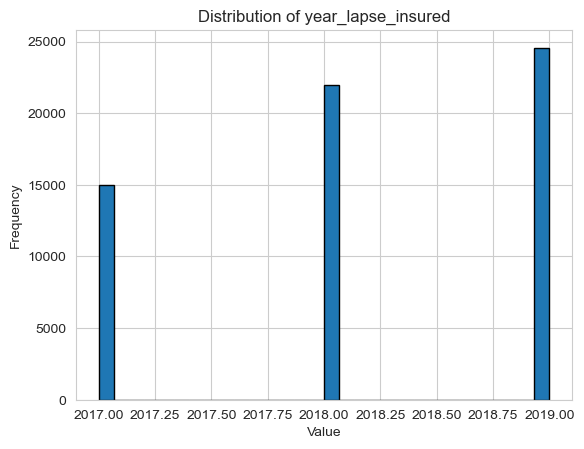

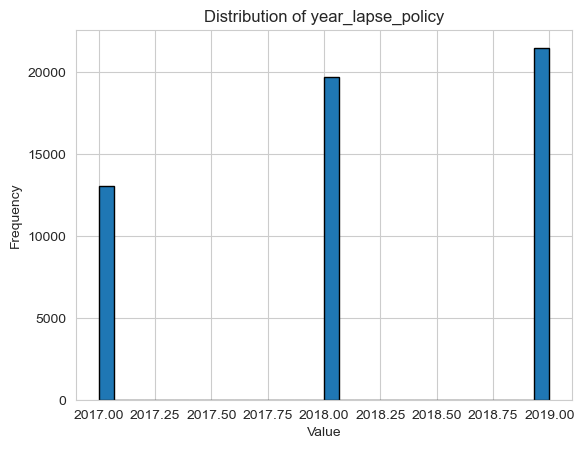

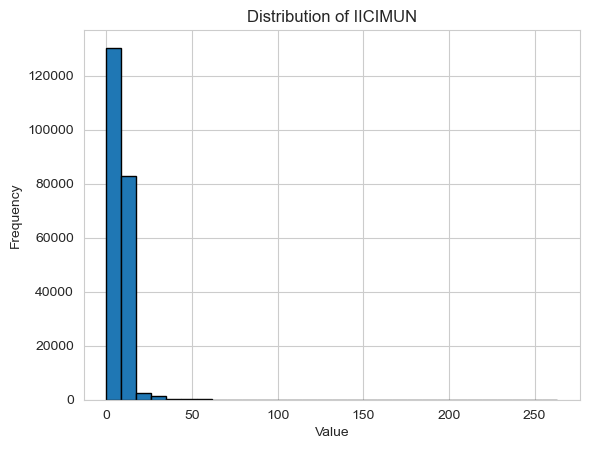

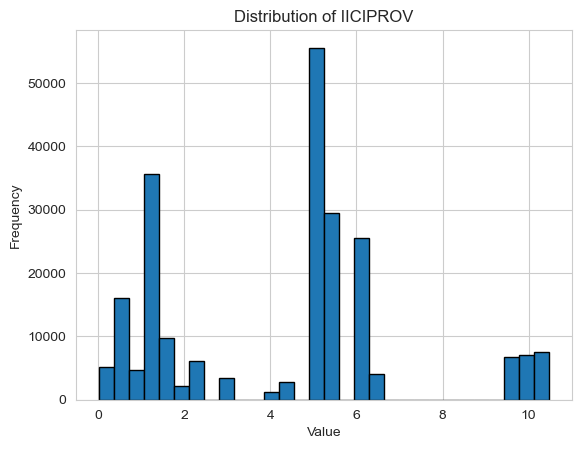

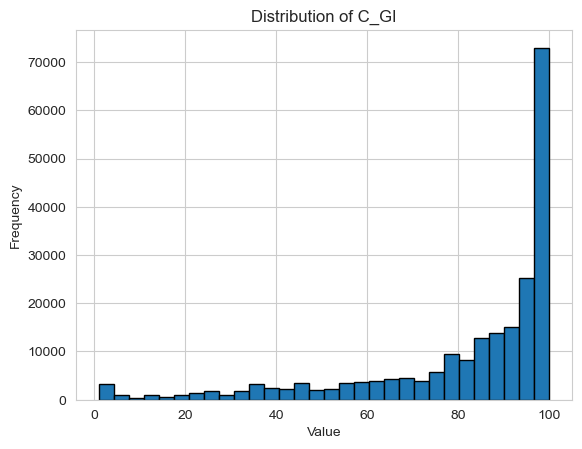

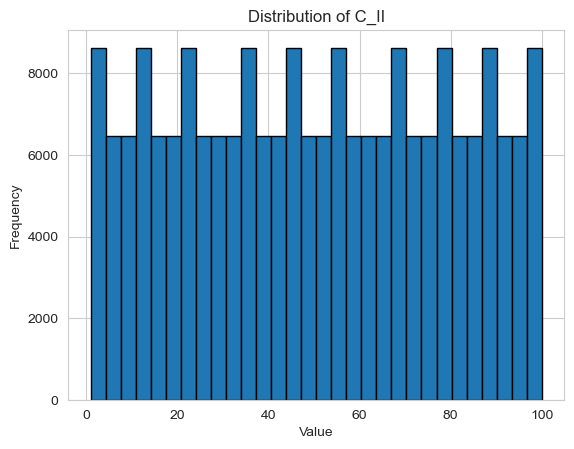

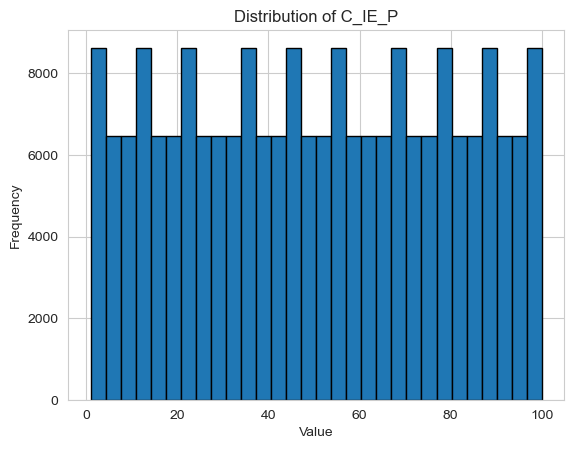

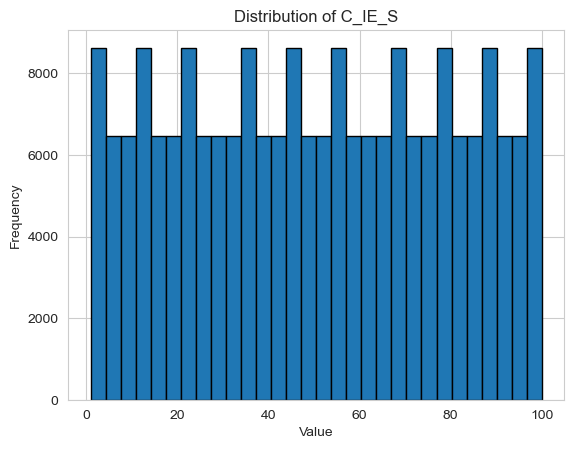

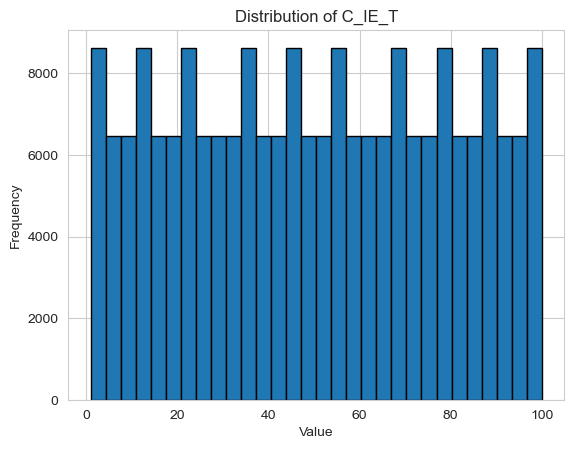

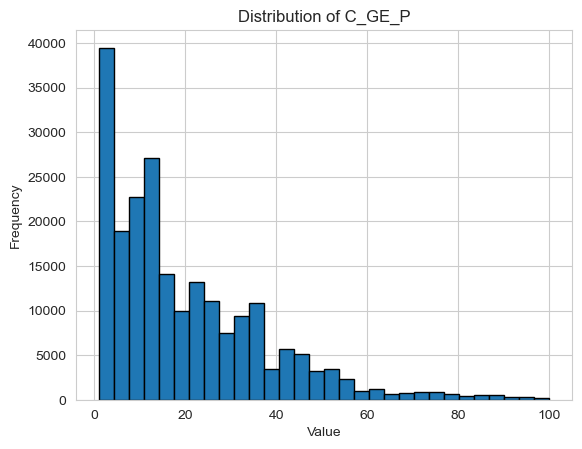

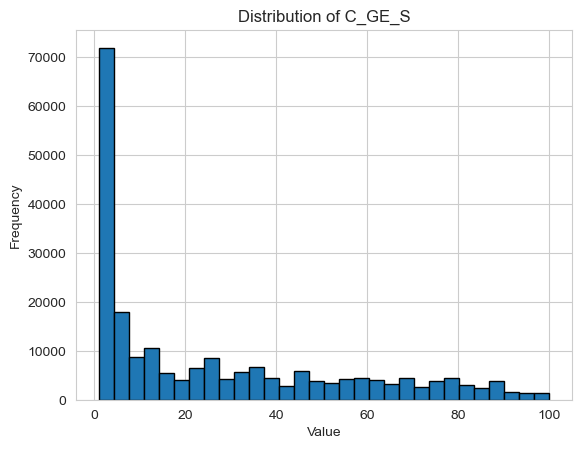

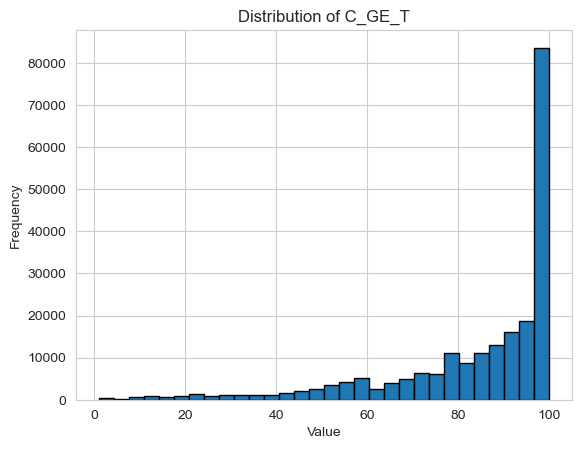

In [87]:
# Numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
#Categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Keep numerical columns with missing values # every non normal distribution missing values is replaced with a median......
numerical_columns_with_missing = [col for col in numerical_columns if data[col].isna().any()]

# Visualizing missing values in numerical columns
for num_col in numerical_columns_with_missing:
    plt.hist(data[num_col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {num_col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show() 

In [88]:
# Filling numerical columns with median
Cols_fill_with_median = ['C_GI', 'C_GE_T', 'C_GE_S', 'C_GE_P', 'IICIMUN', 'date_lapse_insured','date_lapse_policy', 'IICIPROV', 'C_II', 'C_IE_P', 'C_IE_S', 'C_IE_T']

for cols in Cols_fill_with_median:
    data[cols].fillna(data[cols].median())

# Fillling numerical columns with mode #categorical variables replace with the mode.
cols_to_fill_with_mode = ['year_lapse_policy', 'year_lapse_insured']
for cols in cols_to_fill_with_mode:
    data[cols].fillna(data[cols].mode()[0])

#### We need to create a new flag for businesses that are less than an year old, that is businesses that we have acquired within the year and name them new business
#### The rest of the businesses are termed as inforce businesses.

In [89]:
#new business flag
from datetime import datetime

valuation_date = datetime.today() 

data['date_effect_policy'] = pd.to_datetime(data['date_effect_policy'])  

data['PolicyStatus'] = data['date_effect_policy'].apply(
    lambda x: 'New Business' if x.year == valuation_date.year else 'Inforce'
)

In [90]:
# finding out the unique values in the four columns 
print(data['type_policy'].unique())
print(data['type_policy_dg'].unique())
print(data['lapse'].unique())
print(data['PolicyStatus'].unique())

['I' 'C']
['I' 'C1' 'C2' 'SE' 'C3' 'C4']
[1 2 3]
['Inforce']


### Classify or group the data into new business vs inforce, lapsed vs active, scheme vs individual policies.
#### New Business vs In force -- this is a distinction between policies that are less than a year old that are more prone to falling off and ones that are more than a year old.

#### Lapsed vs Inforce -- Policies that have fallen off vs ones that are still actively covered.

#### Scheme vs Individual Policies -- Policies whose members are covered as a group with premiums divided across the members vs policies where the members are individually covered.

In [91]:
# Classify or group the data into new business vs inforce, lapsed vs active, scheme vs individual policies.
# --- New Business vs Inforce ---
data['BusinessType'] = data['new_business'].astype(str).str.strip().str.lower().map({
    'yes': 'New Business',
    'no': 'Inforce'
})

# --- Active vs Lapsed ---
data['PolicyStatus'] = data['lapse'].replace({
    'Active': 'Active',
    'Lapse before expiration': 'Lapsed',
    'Lapse at Expiration': 'Lapsed'
})

# --- Scheme vs Individual ---
data['PolicyCategory'] = data['type_policy'].replace({
    'Individual': 'Individual',
    'Collective': 'Scheme'
})

In [92]:
data['PolicyCategory'].value_counts()

PolicyCategory
I    145471
C     83240
Name: count, dtype: int64

In [93]:
# Value counts
data['PolicyStatus'].value_counts()

PolicyStatus
2    187271
3     25092
1     16348
Name: count, dtype: int64

### 3. Derived Features
##### a) Policy Duration (how long insured client stayed on cover)

In [94]:
data ['date_effect_insured'] = pd.to_datetime(data['date_effect_insured'])
data ['date_lapse_insured'] = pd.to_datetime(data ['date_lapse_insured'])

data ['PolicyDuration_days'] = (data ['date_lapse_insured'].fillna(pd.Timestamp.today()) - data ['date_effect_insured']).dt.days
data ['PolicyDuration_years'] = data ['PolicyDuration_days'] / 365

#### b) Policy Term (overall scheme duration)
##### Using date_effect_policy & date_lapse_policy

In [95]:
data ['date_effect_policy'] = pd.to_datetime(data ['date_effect_policy'])
data ['date_lapse_policy'] = pd.to_datetime(data ['date_lapse_policy'])

data ['PolicyTerm_days'] = (data ['date_lapse_policy'].fillna(pd.Timestamp.today()) - data ['date_effect_policy']).dt.days
data ['PolicyTerm_years'] = data ['PolicyTerm_days'] / 365

#### c) Age Groups

In [96]:
# --- Ensure derived columns exist ---
# AgeGroup
bins_age = [0, 18, 35, 55, 120]
labels_age = ['0-18', '19-35', '36-55', '56+']
data['AgeGroup'] = pd.cut(data['age'], bins=bins_age, labels=labels_age)
# Lapse flag
data['IsLapsed'] = data['PolicyStatus'].apply(lambda x: 1 if x=='Lapsed' else 0)

#### d) Policy Seniority Bins
##### Based on seniority_insured (years with insurer)

In [97]:
# SeniorityBin (insured)
bins_sen = [0, 1, 5, 10, 30, 100]
labels_sen = ['<1yr', '1-5yrs', '5-10yrs', '10-30yrs', '30+yrs']
data['SeniorityBin'] = pd.cut(data['seniority_insured'], bins=bins_sen, labels=labels_sen)


In [98]:
# Average premium per policy type
avg_premium = data.groupby('type_policy')['premium'].mean().reset_index()
avg_premium.rename(columns={'premium':'AvgPremium'}, inplace=True)

#### e) Flags

In [99]:
# Ensure PolicyStatus is string
data['PolicyStatus'] = data['PolicyStatus'].astype(str)

# Create IsLapsed flag for any type of lapse
data['IsLapsed'] = np.where(data['PolicyStatus'].str.contains("Lapse"), 1, 0)

# Create IsNewBusiness flag
data['IsNewBusiness'] = np.where(data['BusinessType']=='New Business', 1, 0)


#### Claim ratios

In [100]:

# Claim ratios
data['ClaimRatio'] = data['cost_claims_year'] / data['premium']

claim_ratios = (
    data.groupby('type_policy', observed=True)['ClaimRatio']
    .mean()
    .reset_index()
)


#### Lapse Rates

In [101]:
# Create a numeric lapse flag: 1 if lapsed, 0 if active
data['IsLapsed'] = data['lapse'].apply(lambda x: 1 if x in [1, 3] else 0)

# Now calculate lapse rates by groups
group_cols = ['AgeGroup', 'gender', 'SeniorityBin', 'type_product', 'type_policy', 'C_II', 'C_H']

lapse_rates = data.groupby(group_cols, observed=True)['IsLapsed'].mean().reset_index()
lapse_rates.rename(columns={'IsLapsed': 'LapseRate'}, inplace=True)

# Example: View the first rows
lapse_rates.head()



,AgeGroup,gender,SeniorityBin,type_product,type_policy,C_II,C_H,LapseRate
0,0-18,F,<1yr,D,I,11.0,H2,1.0
1,0-18,F,<1yr,D,I,12.0,H6,0.0
2,0-18,F,<1yr,D,I,17.0,H6,1.0
3,0-18,F,<1yr,D,I,18.0,H6,0.5
4,0-18,F,<1yr,D,I,20.0,H6,1.0


#### Medical service rate per age band, gender

In [102]:
med_service_rate = data.groupby(['AgeGroup','gender'], observed=True)['n_medical_services'].mean().reset_index()
med_service_rate.rename(columns={'n_medical_services':'AvgMedicalServices'}, inplace=True)



#### Reimbursement rate by channel and product

In [103]:
# Reimbursement rate by channel and product
group_cols = ['distribution_channel', 'type_product']

for col in group_cols:
    data[col] = data[col].astype(str)

# Create flag
data['ReimbursementFlag'] = data['reimbursement'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

# Group and calculate mean
reimbursement_rate = data.groupby(['distribution_channel','type_product'], observed=True)['ReimbursementFlag'].mean().reset_index()
reimbursement_rate.rename(columns={'ReimbursementFlag':'ReimbursementRate'}, inplace=True)

#### Group-wise summaries to discover high-risk or high-cost clusters

In [104]:
high_risk_clusters = data.groupby(['AgeGroup','SeniorityBin','type_product','type_policy'], observed=True)\
                         .agg({
                             'IsLapsed':'mean',
                             'cost_claims_year':'mean',
                             'premium':'mean',
                             'n_medical_services':'mean'
                        }).reset_index()

# Rename columns for clarity
high_risk_clusters.rename(columns={
    'IsLapsed':'LapseRate',
    'cost_claims_year':'AvgClaimCost',
    'premium':'AvgPremium',
    'n_medical_services':'AvgMedicalServices'
}, inplace=True)

#### Correlation analysis among numerical variables measures the strength of the relationship between the numerical variables

In [105]:
numerical_cols = ['age','seniority_insured','seniority_policy','premium','cost_claims_year',
                  'n_medical_services','exposure_time','n_insured_pc','n_insured_mun','n_insured_prov',
                  'IICIMUN','IICIPROV']

correlation_matrix = data[numerical_cols].corr()
correlation_matrix

,age,seniority_insured,seniority_policy,premium,cost_claims_year,n_medical_services,exposure_time,n_insured_pc,n_insured_mun,n_insured_prov,IICIMUN,IICIPROV
age,1.000000,0.536384,0.463464,0.458252,0.166289,0.258688,0.075485,0.075149,0.229051,0.153872,0.069653,0.007374
seniority_insured,0.536384,1.000000,0.960128,0.254330,0.077673,0.166157,0.090833,0.198600,0.467830,0.392266,0.170691,0.088459
seniority_policy,0.463464,0.960128,1.000000,0.226240,0.063997,0.145020,0.087925,0.203529,0.478251,0.404093,0.177392,0.096060
premium,0.458252,0.254330,0.226240,1.000000,0.241537,0.284650,0.046944,-0.040057,-0.025331,-0.089440,0.039678,0.072735
cost_claims_year,0.166289,0.077673,0.063997,0.241537,1.000000,0.595355,0.062756,0.011651,0.007519,-0.013411,0.022000,0.027939
n_medical_services,0.258688,0.166157,0.145020,0.284650,0.595355,1.000000,0.124898,0.035962,0.052422,0.039196,0.005195,0.006293
exposure_time,0.075485,0.090833,0.087925,0.046944,0.062756,0.124898,1.000000,0.048131,0.070319,0.062171,0.029152,0.040183
n_insured_pc,0.075149,0.198600,0.203529,-0.040057,0.011651,0.035962,0.048131,1.000000,0.503680,0.271010,0.442178,0.281069
n_insured_mun,0.229051,0.467830,0.478251,-0.025331,0.007519,0.052422,0.070319,0.503680,1.000000,0.683247,0.398035,0.184828
n_insured_prov,0.153872,0.392266,0.404093,-0.089440,-0.013411,0.039196,0.062171,0.271010,0.683247,1.000000,0.236970,0.339224


# Exploratory Data Analysis 


In [106]:
# Convert categorical columns to category type
categorical_cols = ['gender', 'type_policy', 'type_policy_dg', 'type_product', 
                    'reimbursement', 'distribution_channel', 'BusinessType', 
                    'PolicyStatus', 'PolicyCategory', 'AgeGroup', 'SeniorityBin']

data [categorical_cols] = data [categorical_cols].astype('category')

# One-hot encode for ML
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


## 1️⃣ Product Design: Claim Ratios, Persistency, Lapse by Product Type
1. Which policy types or product characteristics show higher claim ratios?
2. Which policy types or product characteristics show higher Persistency rates?
3. Which policy types or product characteristics show higher lapse (fallout) rates?
4. What customer segments are driving these patterns?

In [107]:
# Lapse Rate by product and policy type
lapse_product = data.groupby(['type_product','type_policy'],observed=True)['IsLapsed'].mean().reset_index()
lapse_product.rename(columns={'IsLapsed':'LapseRate'}, inplace=True)

# Claim Ratio by product and policy type
claim_product = data.groupby(['type_product','type_policy'],observed=True)['ClaimRatio'].mean().reset_index()

# Persistency Rate = 1 - LapseRate
lapse_product['PersistencyRate'] = 1 - lapse_product['LapseRate']

# Optional: Merge claim & lapse info for combined view
product_summary = lapse_product.merge(claim_product, on=['type_product','type_policy'])
product_summary

,type_product,type_policy,LapseRate,PersistencyRate,ClaimRatio
0,D,C,0.045070,0.954930,0.004938
1,D,I,0.218168,0.781832,0.001745
2,I,C,0.529865,0.470135,0.000000
3,I,I,0.161329,0.838671,0.514971
4,P,C,0.235072,0.764928,0.851076
5,P,I,0.215717,0.784283,0.702249
6,S,C,0.158632,0.841368,0.789381
7,S,I,0.178581,0.821419,0.605630


##### Bar chart for claim ratio, lapse rate, and persistency by product type and policy type.
##### Grouped bar chart to compare Individual vs Collective for each product.

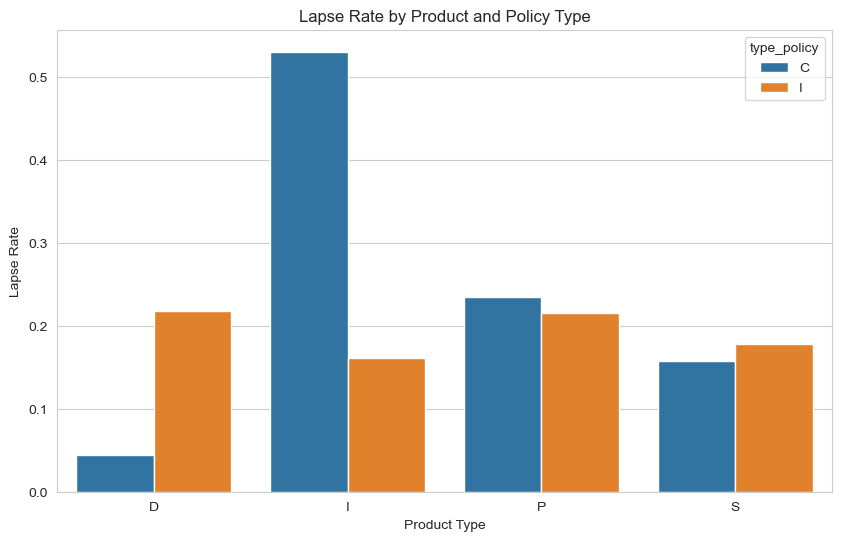

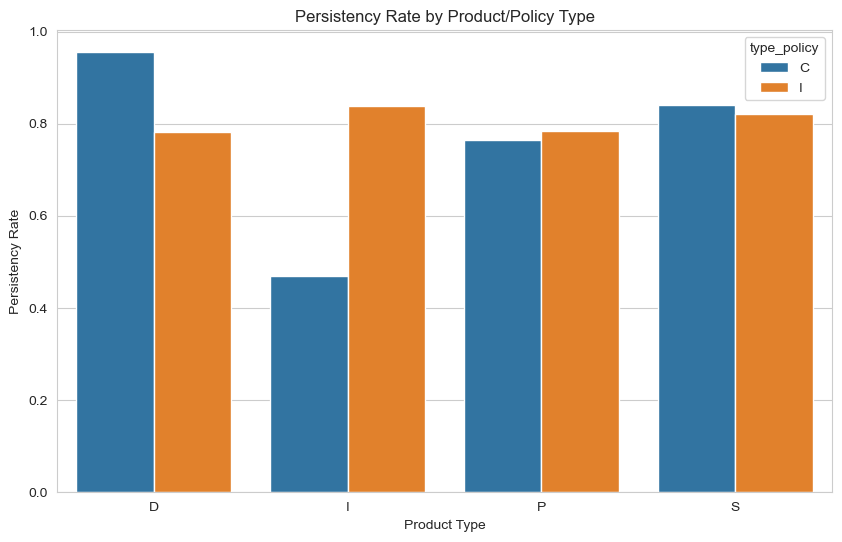

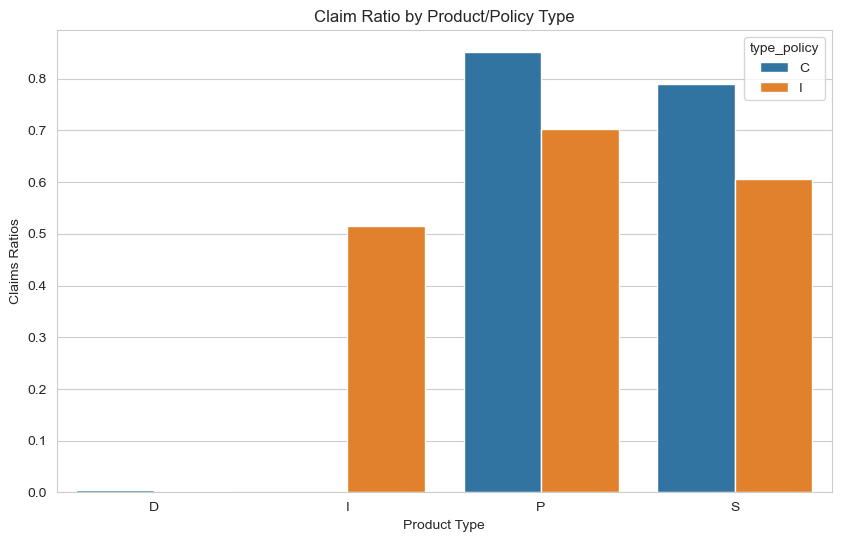

In [108]:
# Grouped bar chart: Lapse rate by Product and Policy Type
plt.figure(figsize=(10,6))
sns.barplot(x='type_product', y='LapseRate', hue='type_policy', data=product_summary)
plt.title('Lapse Rate by Product and Policy Type')
plt.ylabel('Lapse Rate')
plt.xlabel('Product Type')
plt.show()

# Persistency by Product and Policy Type
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='type_product', y='PersistencyRate', hue='type_policy', data=product_summary)
plt.ylabel('Persistency Rate')
plt.xlabel('Product Type')
plt.title('Persistency Rate by Product/Policy Type')
plt.show()

# Claims by Product and Policy Type
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='type_product', y='ClaimRatio', hue='type_policy', data=product_summary)
plt.ylabel('Claims Ratios')
plt.xlabel('Product Type')
ax.set_title('Claim Ratio by Product/Policy Type')
plt.show()

### Observations:

International Collective and Premium Collective policies show the highest fallout percentages, likely due to high-risk coverage and premium amounts.

International Collective policies have a claim ratio of 0, meaning most clients do not utilize the covered risk.

Dental Collective policies demonstrate the highest persistency rates and low claim ratios.

Premium Collective policies have the highest claim ratio (~0.85), but this aligns with their large share of policyholders.

Dental Individual policies also have relatively high claim ratios.

### Implications:

Policies with higher premiums and group coverage show higher claims risk but also reflect expected utilization patterns.

Low claims in International Collective policies suggest potential underutilization or barriers to claim access.

## 2️⃣ Distribution Channel Analysis
1. How do lapse rates, claim costs and customer profiles vary across distribution channels?
2.  Which channel delivers the most profitable and persistent business?

In [110]:
# Lapse rate, claim cost, premium by channel
channel_summary = data.groupby('distribution_channel',observed=True).agg({
    'IsLapsed':'mean',
    'cost_claims_year':'mean',
    'premium':'mean'
}).reset_index()

channel_summary.rename(columns={
    'IsLapsed':'LapseRate',
    'cost_claims_year':'AvgClaimCost',
    'premium':'AvgPremium'
}, inplace=True)

# Profitability metric: Premium minus claims
channel_summary['AvgProfit'] = channel_summary['AvgPremium'] - channel_summary['AvgClaimCost']
channel_summary

,distribution_channel,LapseRate,AvgClaimCost,AvgPremium,AvgProfit
0,A,0.197147,530.886757,798.907375,268.020617
1,D,0.251594,177.517064,512.838552,335.321488
2,I,0.171036,626.048526,887.287567,261.239041


##### Bar chart for average claim cost, premium, and profit by distribution channel.
Stacked bar chart for lapse rate by channel.

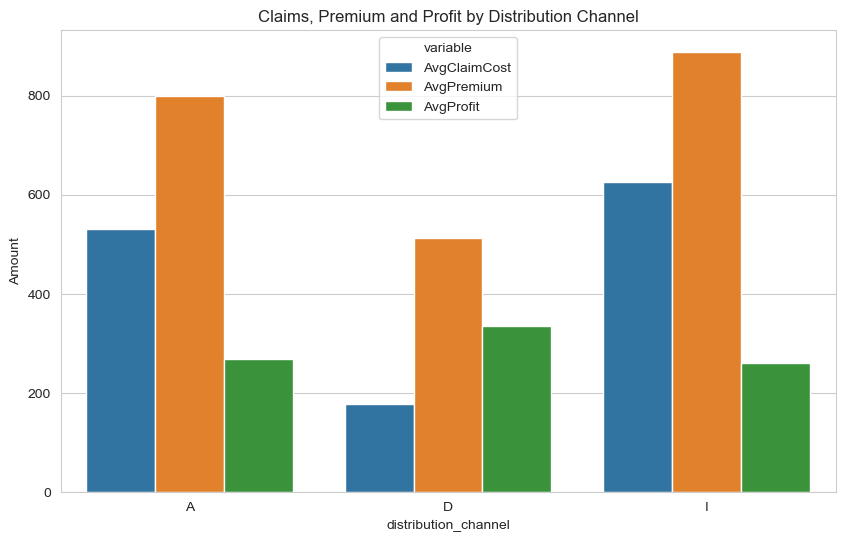

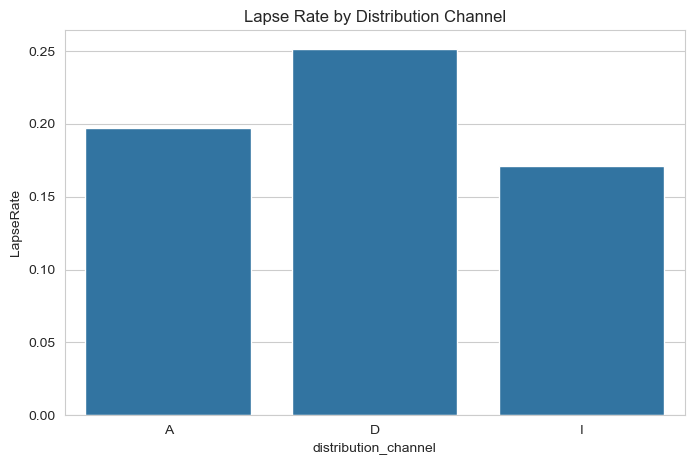

In [111]:
# Bar chart for profitability
channel_summary_melt = channel_summary.melt(id_vars='distribution_channel', value_vars=['AvgClaimCost','AvgPremium','AvgProfit'])
plt.figure(figsize=(10,6))
sns.barplot(x='distribution_channel', y='value', hue='variable', data=channel_summary_melt)
plt.title('Claims, Premium and Profit by Distribution Channel')
plt.ylabel('Amount')
plt.show()

# Lapse rate by channel
plt.figure(figsize=(8,5))
sns.barplot(x='distribution_channel', y='LapseRate', data=channel_summary)
plt.title('Lapse Rate by Distribution Channel')
plt.show()

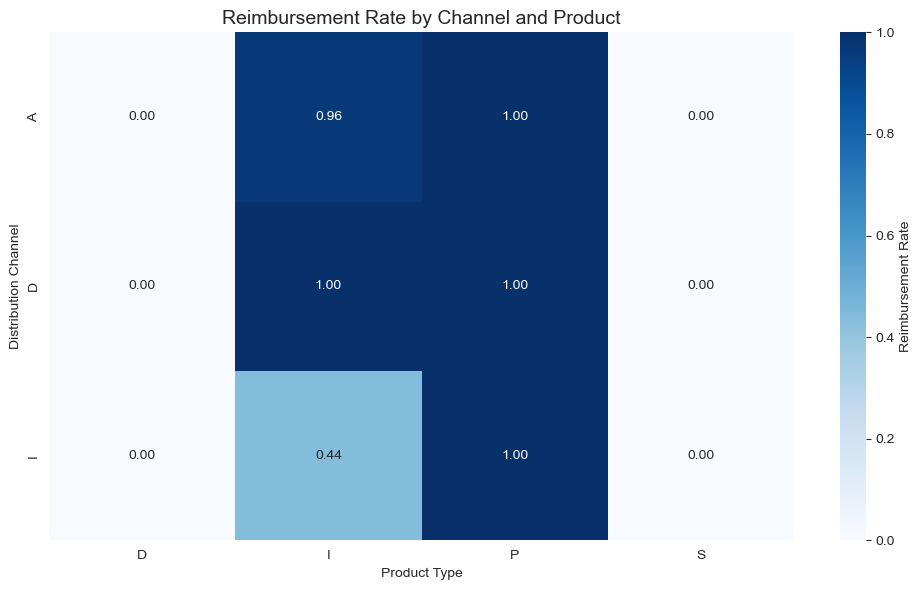

In [112]:
# Pivot for heatmap
pivot_reimburse = reimbursement_rate.pivot(
    index='distribution_channel',
    columns='type_product',
    values='ReimbursementRate'
)

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_reimburse,
    annot=True, fmt=".2f",
    cmap="Blues",
    cbar_kws={'label': 'Reimbursement Rate'}
)

plt.title('Reimbursement Rate by Channel and Product', fontsize=14)
plt.xlabel('Product Type')
plt.ylabel('Distribution Channel')
plt.tight_layout()
plt.show()


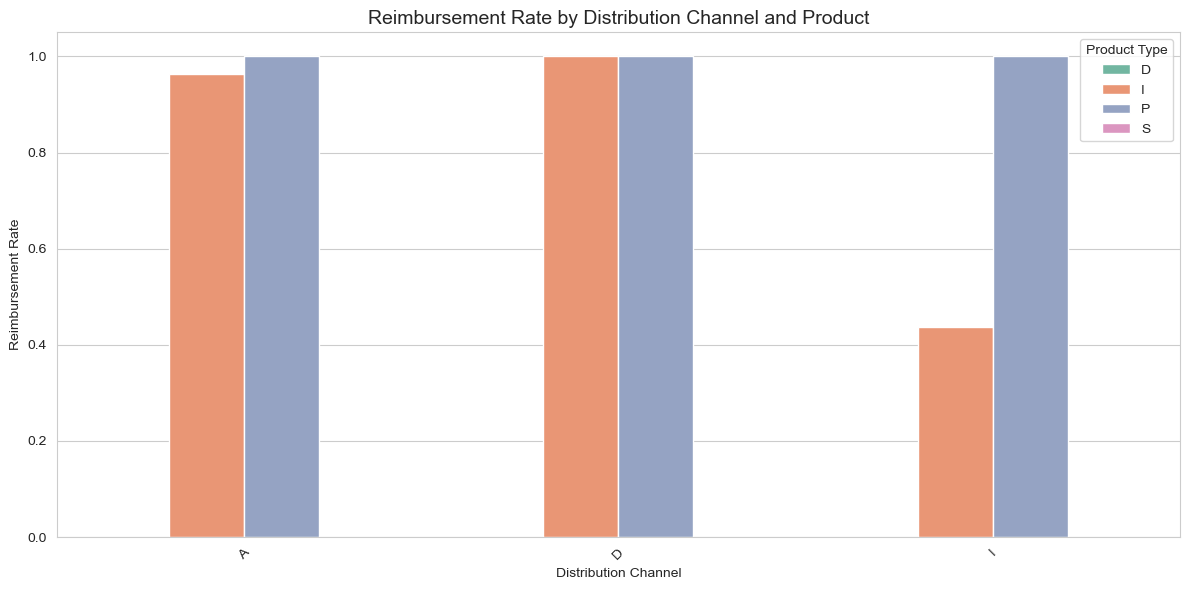

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=reimbursement_rate,
    x='distribution_channel',
    y='ReimbursementRate',
    hue='type_product',
    palette='Set2'
)

plt.title('Reimbursement Rate by Distribution Channel and Product', fontsize=14)
plt.xlabel('Distribution Channel')
plt.ylabel('Reimbursement Rate')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()


### Observations 
Direct business channel shows the highest lapse rate (25%) but also the highest average profit, due to lower claim costs and moderate premiums.

Intermediary channels have highest average claim costs, low profits, and the highest premiums collected.

Agency-sourced business has moderately high premiums and claims, with overall higher  profitability than the other two channels.

Reimbursement rates across channels are generally high.

### Implications:

Direct business is profitable despite higher lapse rates, suggesting efficient underwriting and low claims exposure.

Intermediaries may drive higher revenue but also higher claims, reducing profitability. 

## 3️⃣ Demographics, Socioeconomic, Geographic Factors
1. What demographic, socioeconomic and geographic factors are associated with higher risk of claims or early lapse?

2. How does this affect our policy and claim underwriting procedures?

In [114]:
# Lapse and claims by demographic
demo_summary = data.groupby(['AgeGroup','gender','C_II','C_GE_T'],observed=True).agg({
    'IsLapsed':'mean',
    'cost_claims_year':'mean'
}).reset_index()

demo_summary.rename(columns={
    'IsLapsed':'LapseRate',
    'cost_claims_year':'AvgClaimCost'
}, inplace=True)

demo_summary

,AgeGroup,gender,C_II,C_GE_T,LapseRate,AvgClaimCost
0,0-18,F,1.0,2.0,0.000000,605.349600
1,0-18,F,1.0,3.0,0.000000,417.863767
2,0-18,F,1.0,6.0,0.500000,0.000000
3,0-18,F,1.0,8.0,0.500000,191.493550
4,0-18,F,1.0,11.0,0.000000,79.088050
...,...,...,...,...,...,...
17734,56+,M,97.0,100.0,0.093137,954.261192
17735,56+,M,98.0,100.0,0.079082,1213.303638
17736,56+,M,99.0,98.0,0.000000,179.520000
17737,56+,M,99.0,100.0,0.077694,1329.343099


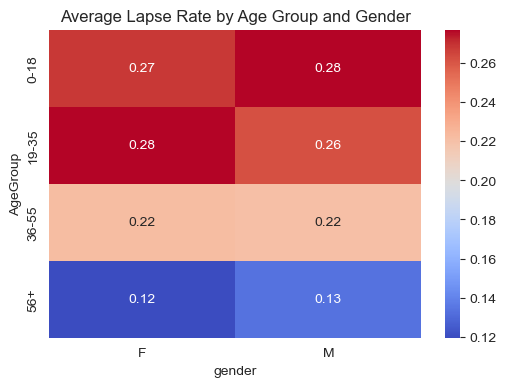

In [115]:
## Heatmaps for lapse rate by age group vs gender.
# Heatmap: Lapse by Age & Gender
lapse_demo_pivot = demo_summary.pivot_table(
    index='AgeGroup',
    columns='gender',
    values='LapseRate',
    aggfunc='mean'  
,observed=True)

plt.figure(figsize=(6,4))
sns.heatmap(lapse_demo_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Average Lapse Rate by Age Group and Gender')
plt.show()


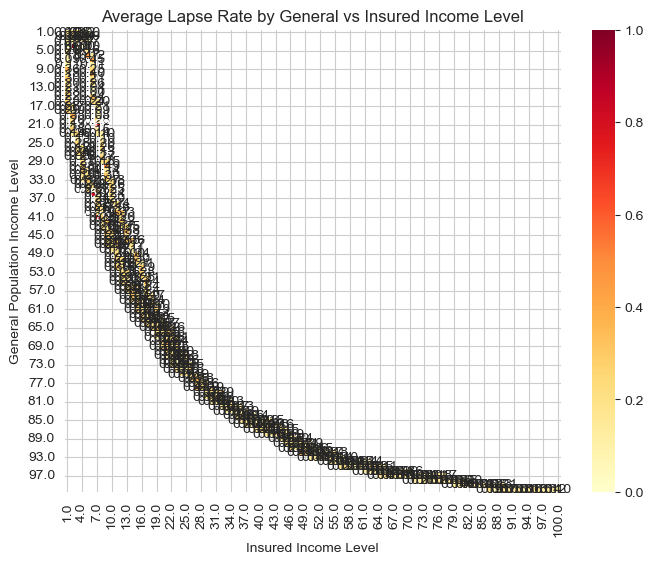

In [116]:
## Bar plots for claims by income or education level.

# Create a numeric lapse flag: 1 if lapsed, 0 if active
data['PolicyLapseFlag'] = data['lapse'].apply(lambda x: 1 if x in [1, 3] else 0)

# Now pivot by income levels
lapse_income_pivot = data.pivot_table(
    index='C_GI',        # General population income category
    columns='C_II',      # Insured population income category
    values='PolicyLapseFlag',  # numeric flag
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(lapse_income_pivot, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Average Lapse Rate by General vs Insured Income Level')
plt.xlabel('Insured Income Level')
plt.ylabel('General Population Income Level')
plt.show()



## Observations 

The lower the income level is for an insured person the higher the lapse rates and vice versa for persistency rates. 
The lapse rate is a decreasing function of income level. as the insured income level approches 100, the lapse rates decrease.

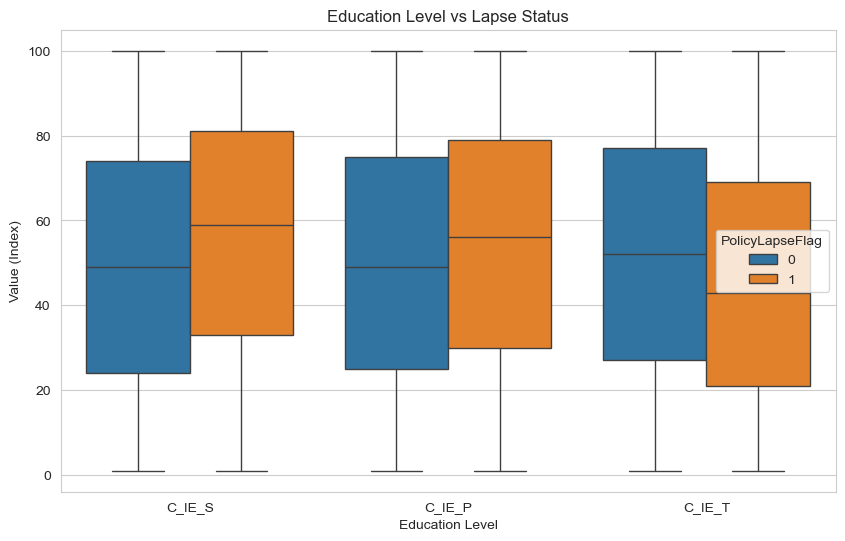

In [117]:
## Boxplots to show spread of claims across regions/municipalities

# Education vs lapse rate
edu_summary = pd.melt(
    data,
    id_vars=["PolicyLapseFlag"],
    value_vars=["C_IE_S","C_IE_P","C_IE_T"],
    var_name="Education_Level",
    value_name="Value"
)

plt.figure(figsize=(10,6))
sns.boxplot(data=edu_summary, x="Education_Level", y="Value", hue="PolicyLapseFlag")
plt.title("Education Level vs Lapse Status")
plt.xlabel("Education Level")
plt.ylabel("Value (Index)")
plt.show()

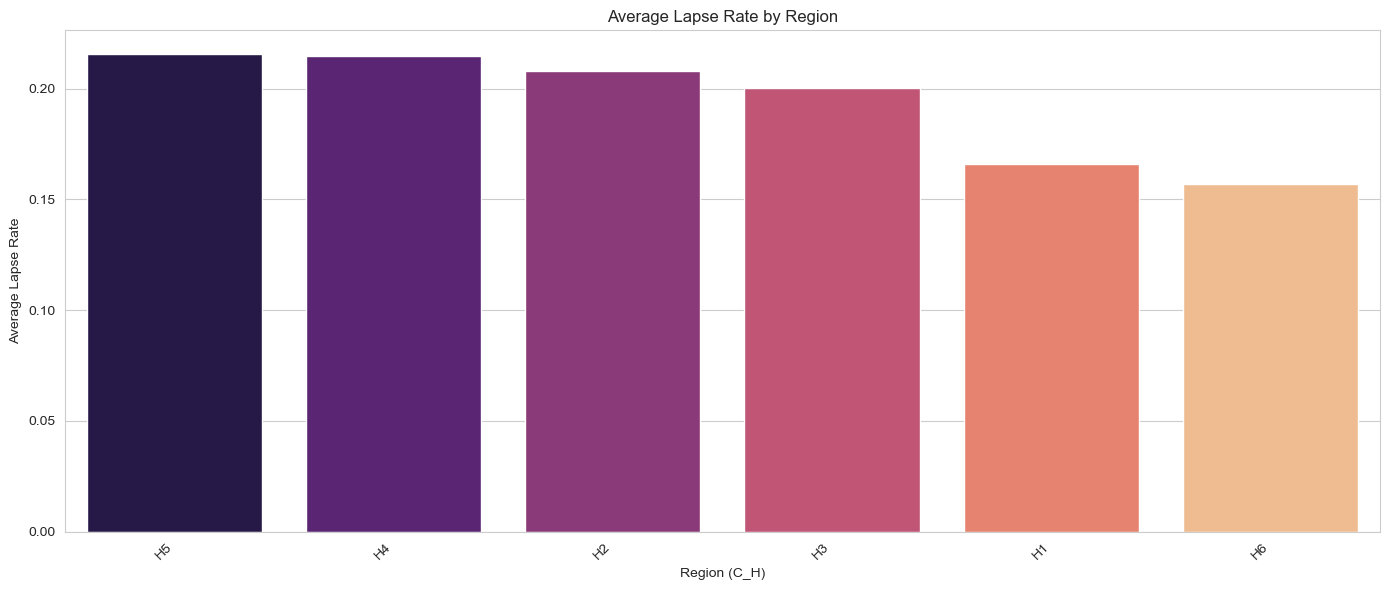

In [118]:
# Lapse rate by Municipality

# Calculate lapse rate by C_H
lapse_region = data.groupby('C_H', observed=True)['PolicyLapseFlag'].mean().reset_index()
lapse_region = lapse_region.sort_values('PolicyLapseFlag', ascending=False)

# Vertical bar plot: regions on x-axis
plt.figure(figsize=(14,6))
sns.barplot(
    data=lapse_region,
    x='C_H',
    y='PolicyLapseFlag',
    hue='C_H',               # Explicitly use C_H as hue
    dodge=False,             # No dodging since it's the same variable
    palette='magma',
    legend=False             # Hide legend (since it's redundant)
)
plt.ylabel('Average Lapse Rate')
plt.xlabel('Region (C_H)')
plt.title('Average Lapse Rate by Region')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()


##### The regions with the highest lapse rates as H5,H4 & H3 respectively with the regions standing for Municipalities with between 1,001 and 100,000 inhabitants

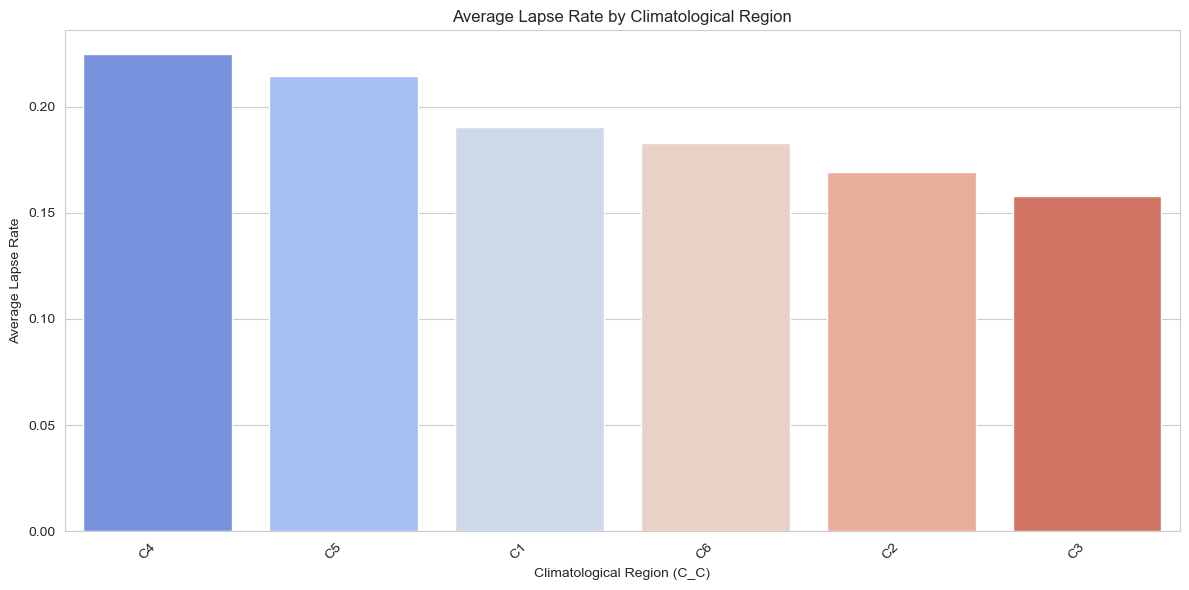

In [119]:
lapse_climate = data.groupby('C_C', observed=True)['PolicyLapseFlag'].mean().reset_index()
lapse_climate = lapse_climate.sort_values('PolicyLapseFlag', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=lapse_climate,
    x='C_C',
    y='PolicyLapseFlag',
    hue='C_C',          # Explicit hue
    dodge=False,        # Prevent duplicate bars
    palette='coolwarm',
    legend=False        # Hide legend since hue == x
)
plt.ylabel('Average Lapse Rate')
plt.xlabel('Climatological Region (C_C)')
plt.title('Average Lapse Rate by Climatological Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

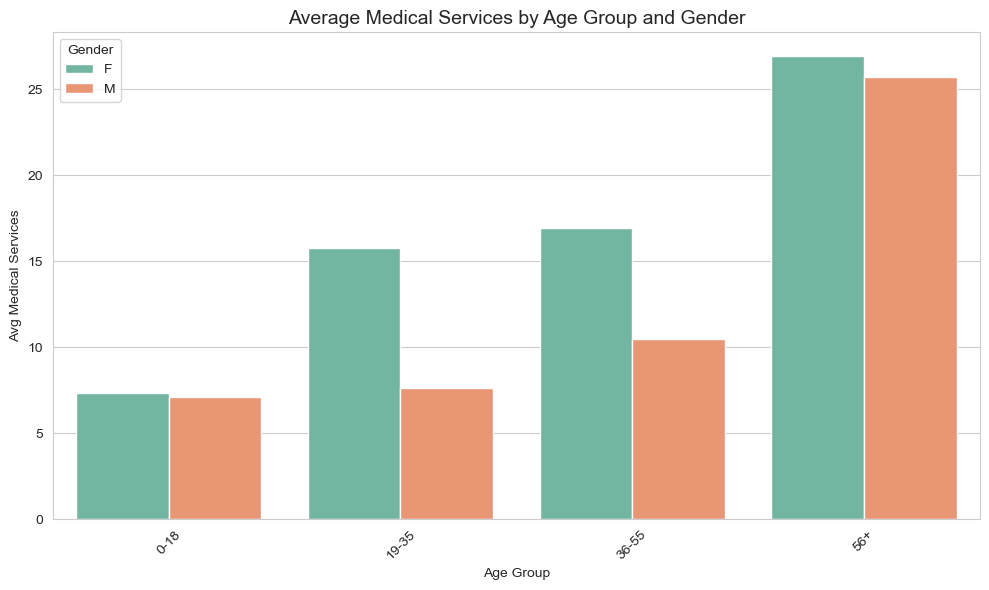

In [120]:
#average number of medical services used by age group and gender 
plt.figure(figsize=(10,6))
sns.barplot(
    data=med_service_rate,
    x='AgeGroup',
    y='AvgMedicalServices',
    hue='gender',
    palette='Set2'
)

plt.title('Average Medical Services by Age Group and Gender', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Avg Medical Services')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


## Observations 
The lower the income level is for an insured person the higher the lapse rates and vice versa for persistency rates. 

The lapse rate is a decreasing function of income level. as the insured income level approches 100, the lapse rates decrease.

Early and overall lapse rates are higher among policyholders with primary and secondary education, lower among higher-educated clients.

Older policyholders tend to use more medical services.

Policyholders in continental climate zones and densely populated regions show higher lapse rates.

### Implications:

Education level, age, and geographic location influence lapse risk.

These factors should be considered in underwriting and retention strategies.

## 4️⃣ Characteristics of Early Lapses vs Full-Term Policies
1. What characteristics differentiate policies that lapse early from those that remain active till the policy term ends
2. What patterns suggest opportunities for intervention to improve persistency?

In [121]:
# Flag early lapse
data['EarlyLapse'] = data['lapse'].apply(lambda x: 1 if x==1 else 0)

# Summary by age, gender, product, policy type
early_lapse_summary = data.groupby(['AgeGroup','gender','type_product','type_policy'], observed=True).agg({
    'EarlyLapse':'mean',
    'cost_claims_year':'mean',
    'premium':'mean'
}).reset_index()

early_lapse_summary.rename(columns={
    'EarlyLapse':'EarlyLapseRate',
    'cost_claims_year':'AvgClaimCost',
    'premium':'AvgPremium'
}, inplace=True)
early_lapse_summary

,AgeGroup,gender,type_product,type_policy,EarlyLapseRate,AvgClaimCost,AvgPremium
0,0-18,F,D,I,0.129032,0.000000,98.319854
1,0-18,F,I,I,0.066667,62.124546,381.845950
2,0-18,F,P,C,0.088043,249.374414,411.187521
3,0-18,F,P,I,0.106814,262.807230,497.383559
4,0-18,F,S,C,0.076420,222.935323,563.987792
5,0-18,F,S,I,0.090297,232.204279,537.576379
6,0-18,M,D,I,0.110294,0.000000,98.551282
7,0-18,M,I,I,0.106796,97.005327,425.893238
8,0-18,M,P,C,0.112360,234.747309,394.466572
9,0-18,M,P,I,0.114344,298.503044,501.076443


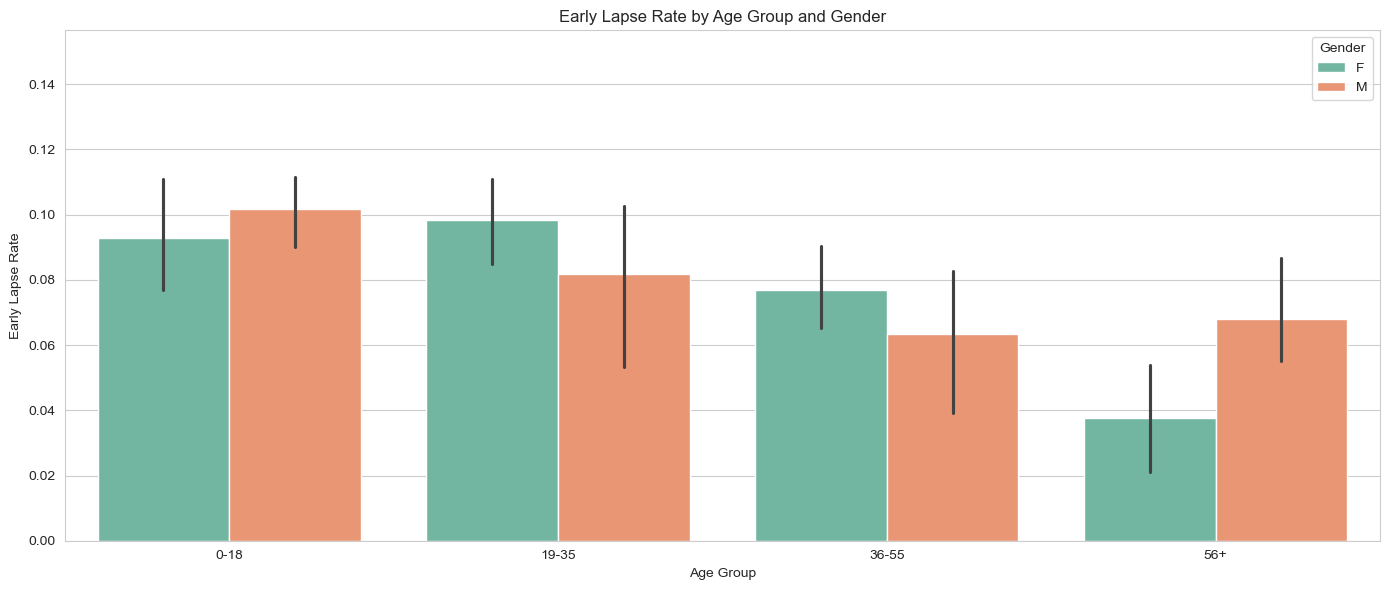

In [122]:
# Set style
sns.set_style("whitegrid")

# Plot Early Lapse Rate by AgeGroup and Gender
plt.figure(figsize=(14,6))

# Create a barplot with AgeGroup on x-axis, EarlyLapseRate on y-axis, hue as gender
sns.barplot(
    data=early_lapse_summary, 
    x='AgeGroup', 
    y='EarlyLapseRate', 
    hue='gender', 
    palette='Set2'
)

plt.title('Early Lapse Rate by Age Group and Gender')
plt.ylabel('Early Lapse Rate')
plt.xlabel('Age Group')
plt.ylim(0, early_lapse_summary['EarlyLapseRate'].max()*1.2)  # Add some headroom
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


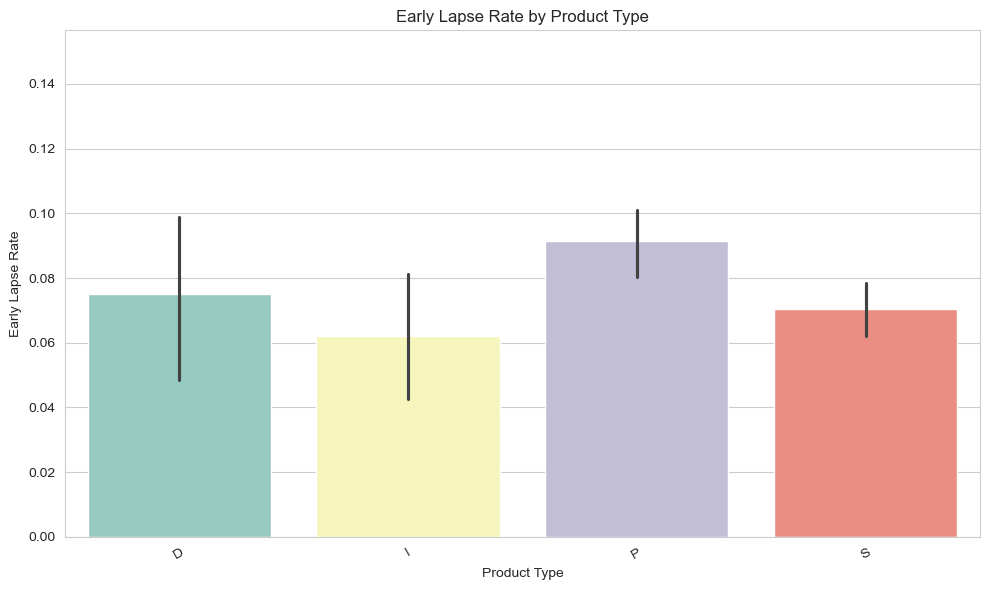

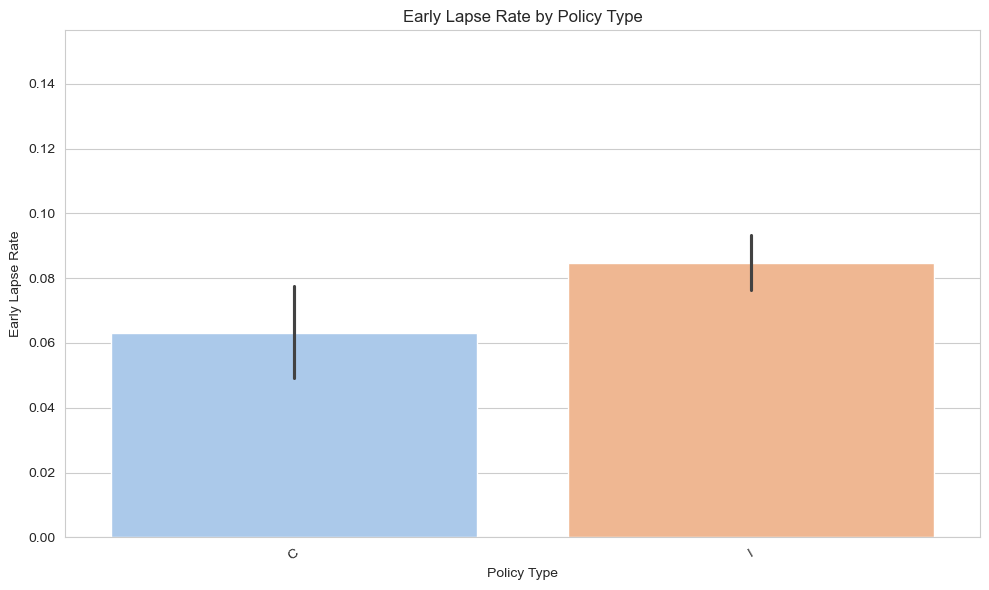

In [123]:
sns.set_style("whitegrid")
# --- 2. Early Lapse by Type Product ---
plt.figure(figsize=(10,6))
sns.barplot(data=early_lapse_summary, x='type_product', y='EarlyLapseRate', hue='type_product', palette='Set3')
plt.title('Early Lapse Rate by Product Type')
plt.ylabel('Early Lapse Rate')
plt.xlabel('Product Type')
plt.ylim(0, early_lapse_summary['EarlyLapseRate'].max()*1.2)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# --- 3. Early Lapse by Type Policy ---
plt.figure(figsize=(10,6))
sns.barplot(data=early_lapse_summary, x='type_policy', y='EarlyLapseRate', hue='type_policy', palette='pastel')
plt.title('Early Lapse Rate by Policy Type')
plt.ylabel('Early Lapse Rate')
plt.xlabel('Policy Type')
plt.ylim(0, early_lapse_summary['EarlyLapseRate'].max()*1.2)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


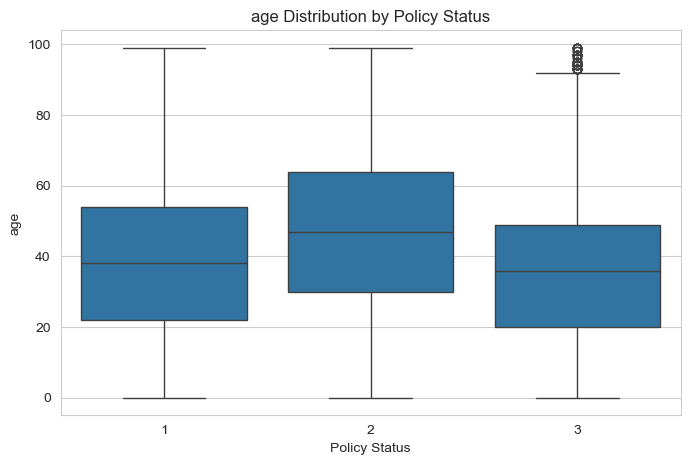

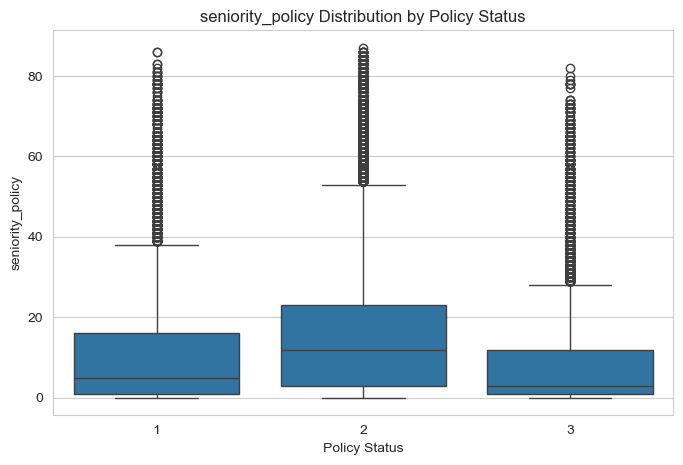

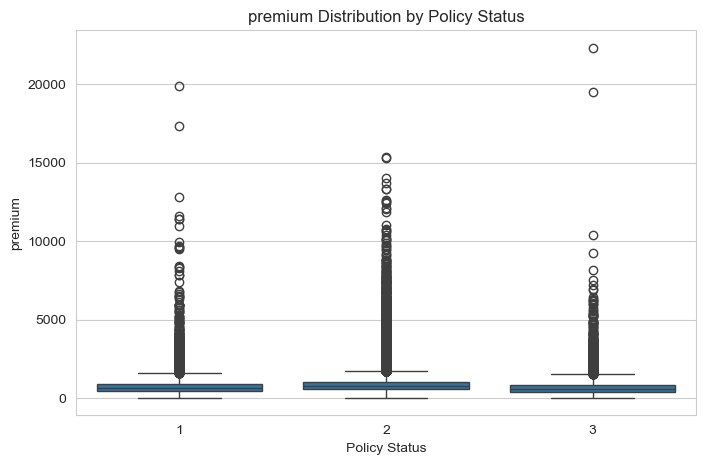

In [124]:
numeric_cols = ['age', 'seniority_policy', 'premium']  # add other relevant numeric columns

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='PolicyStatus', y=col, data=data, legend=False)
    plt.title(f'{col} Distribution by Policy Status')
    plt.ylabel(col)
    plt.xlabel('Policy Status')
    plt.show()


### Observations 
Younger policyholders (<35 years) and older males are more likely to lapse early.

Premium and International plan holders have higher early lapse rates.

Lapsed policies often have higher premium values; active policies tend to have lower premiums.

Early lapse rates decline with increasing age; average age for active policies is ~50 vs. 35 for lapsed.

Seniority for lapsed policies is low, while active policies show a normal distribution with some long-term outliers.

### Implications:

Affordability and product complexity may contribute to early lapses among younger or high-premium clients.

Policy tenure is positively associated with persistency.



# Insights 

## Key Insights:

Policy types, premium levels, and distribution channels significantly affect lapse rates, claims, and profitability.

Demographics (age, education), geography, and policy tenure are strong predictors of early lapse.

High-risk clients can be identified by product type, premium, and early utilization patterns.

Income effect: The lower the income level of an insured person, the higher the lapse rates; conversely, higher-income insureds show higher persistency. Lapse rate decreases as insured income approaches the top range (100).

## Recommendations:

Retention Focus: Target younger, high-premium, low-income, or less-educated clients with tailored engagement programs.

Pricing & Underwriting: Reassess high-claim policies for sustainable pricing and coverage optimization.

Distribution Management: Prioritize direct business growth while controlling intermediary-driven claim costs.

Predictive Analytics: Implement data-driven models to flag high-risk lapses and inform intervention strategies.

Regional & Socioeconomic Strategies: Adjust policy offerings and communication strategies based on geographic location, income levels, and socio-economic factors.